# Cpitulo 4


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import figure
import arviz as az
import pymc3 as pm
import pandas as pd

%matplotlib inline

Text(0.5, 0, '$y$')

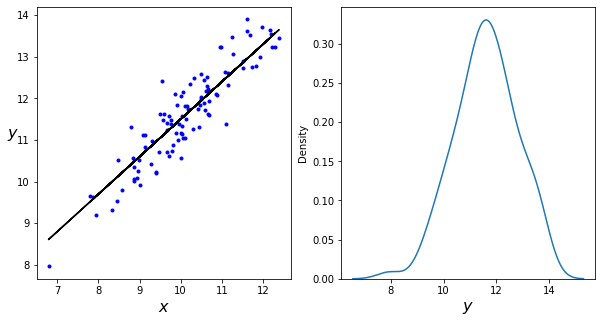

In [2]:
np.random.seed(314)
N = 100
alfa_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alfa_real + beta_real * x
y = y_real + eps_real
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, 'b.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.plot(x, y_real, 'k')
plt.subplot(1,2,2)
sns.kdeplot(y)
plt.xlabel('$y$', fontsize=16)

In [3]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = pm.Deterministic('mu', alpha + beta * x)
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(10000, step, start)

<ipython-input-3-05ea30532dee>:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000, step, start)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 21 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


$r$ e $rb$ e $rss$ = $\beta\frac{\sigma(x)}{\sigma(y)}$

That is, the slope and the Pearson correlation coefficient have the same value only when the standard deviation of x and y are equal. Notice that it is true, for example, when we standardize the data. Just to clarify:

* The Pearson correlation coefficient is a measure of the degree of correlation between two variables and is always restricted to the interval [-1, 1]. The scale of the data is irrelevant.
* The slope indicates how much y changes per unit change of x and can take any real value.

The Pearson coefficient is related to a quantity known as the determination coefficient and for a linear regression model it is just the square of the Pearson coefficient, that is, r2 (or R2 and pronounced just as r squared). The determination coefficient can be interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.


<ipython-input-7-44bd6df5dac6>:14: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_n = pm.sample(10000, step=step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 60 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
<ipython-input-7-44bd6df5dac6>:17: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_n)
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'rb'}>,
        <AxesSubplot:title={'center':'rb'}>],
       [<AxesSubplot:title={'center':'rss'}>,
        <AxesSubplot:title={'center':'rss'}>]], dtype=object)

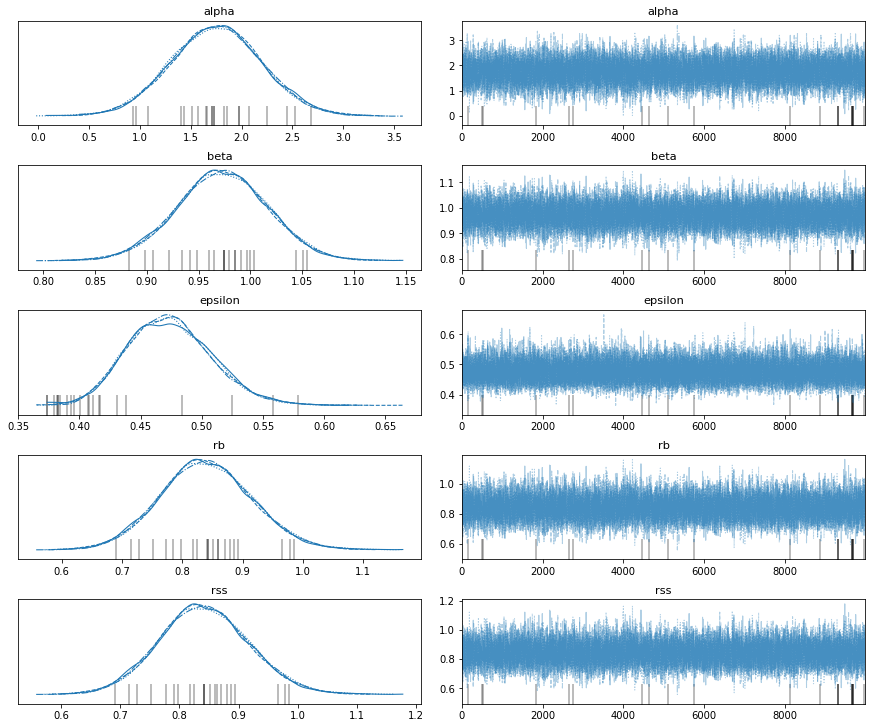

In [7]:
with pm.Model() as model_n:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)
    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    rb = pm.Deterministic('rb', (beta * x.std() / y.std()) ** 2)
    y_mean = y.mean()
    ss_reg = pm.math.sum((mu - y_mean) ** 2)
    ss_tot = pm.math.sum((y - y_mean) ** 2)
    rss = pm.Deterministic('rss', ss_reg/ss_tot)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace_n = pm.sample(10000, step=step, start=start)
burnin = 1000
chain_n = trace_n[burnin:]
pm.traceplot(trace_n)

In [ ]:
pm.traceplot(trace);

In [ ]:
pm.traceplot(trace_n);

<ipython-input-8-b4710412d673>:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace, varnames)
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha\n0'}>,
        <AxesSubplot:title={'center':'alpha\n1'}>,
        <AxesSubplot:title={'center':'alpha\n2'}>],
       [<AxesSubplot:title={'center':'alpha\n3'}>,
        <AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n1'}>],
       [<AxesSubplot:title={'center':'beta\n2'}>,
        <AxesSubplot:title={'center':'beta\n3'}>,
        <AxesSubplot:title={'center':'epsilon\n0'}>],
       [<AxesSubplot:title={'center':'epsilon\n1'}>,
        <AxesSubplot:title={'center':'epsilon\n2'}>,
        <AxesSubplot:title={'center':'epsilon\n3'}>]], dtype=object)

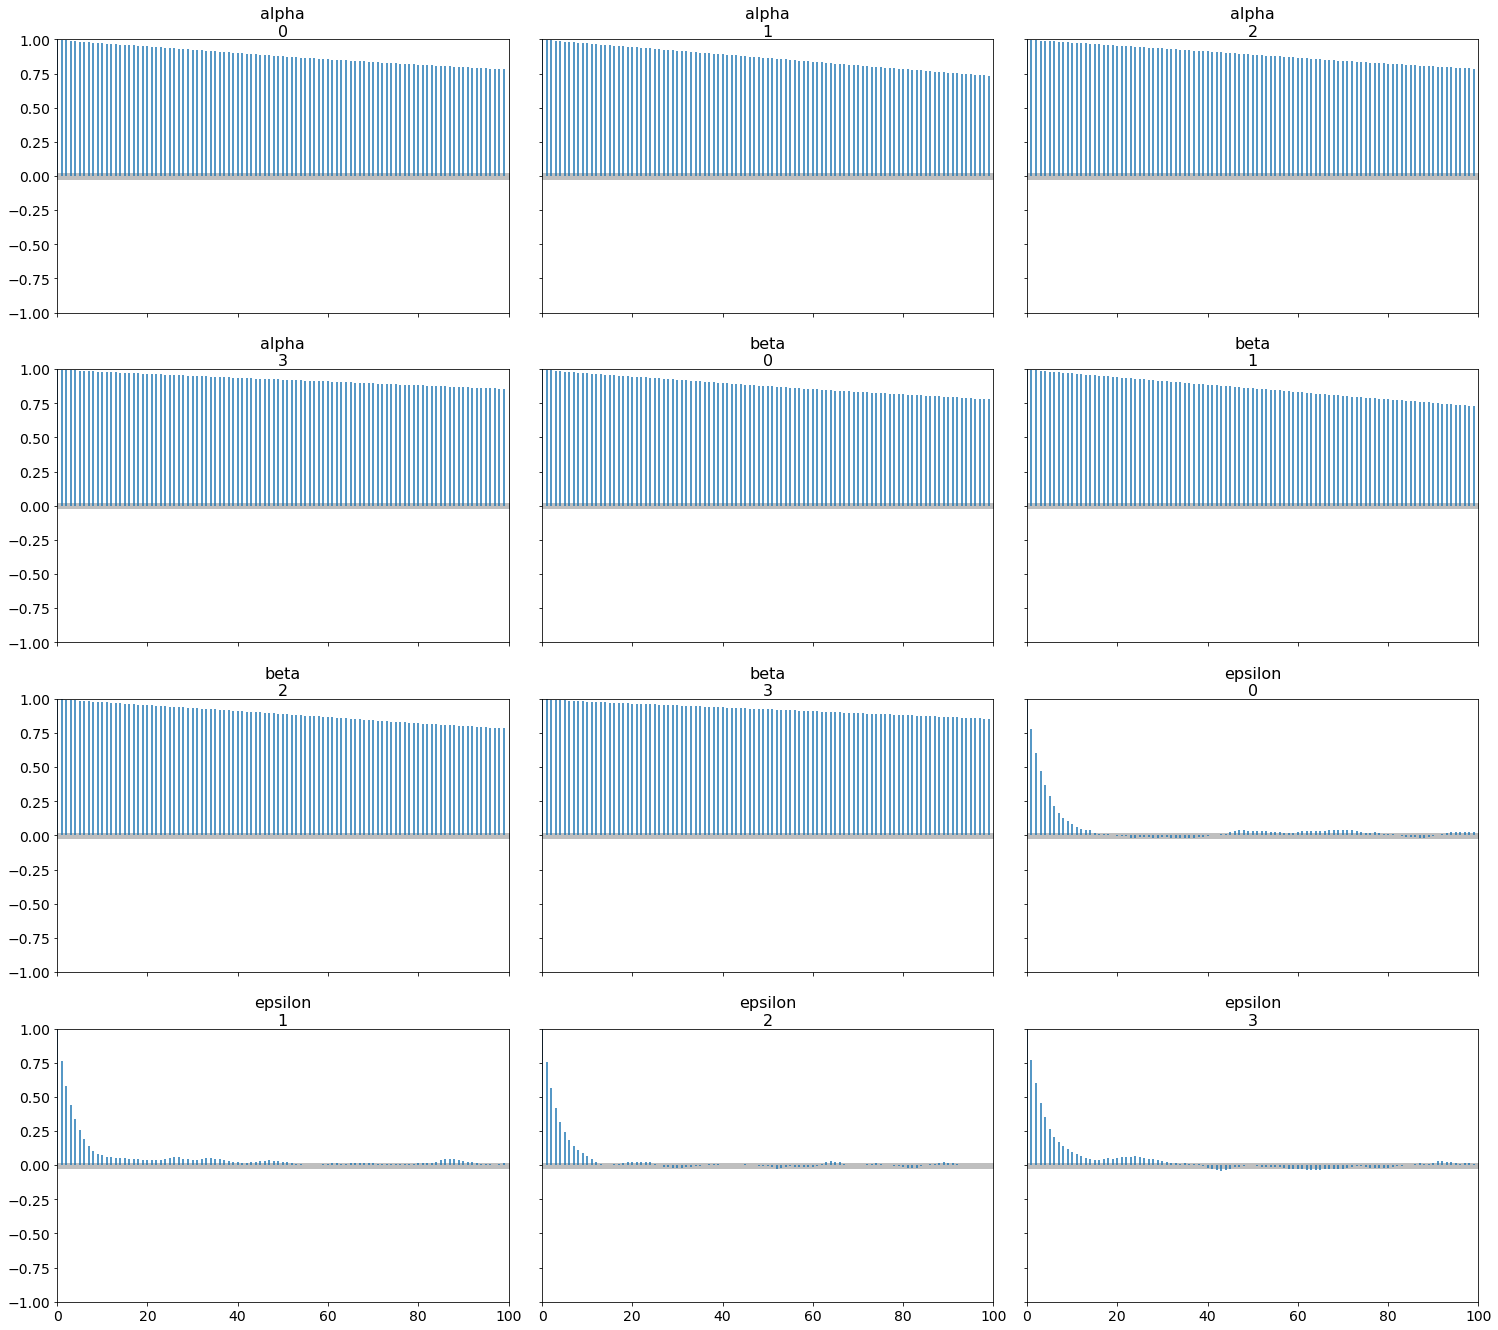

In [8]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace, varnames)

<ipython-input-9-19cc40e378e5>:2: DeprecationWarning: The function `autocorrplot` from PyMC3 is just an alias for `plot_autocorr` from ArviZ. Please switch to `pymc3.plot_autocorr` or `arviz.plot_autocorr`.
  pm.autocorrplot(trace_n, varnames)
/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'alpha\n0'}>,
        <AxesSubplot:title={'center':'alpha\n1'}>,
        <AxesSubplot:title={'center':'alpha\n2'}>],
       [<AxesSubplot:title={'center':'alpha\n3'}>,
        <AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n1'}>],
       [<AxesSubplot:title={'center':'beta\n2'}>,
        <AxesSubplot:title={'center':'beta\n3'}>,
        <AxesSubplot:title={'center':'epsilon\n0'}>],
       [<AxesSubplot:title={'center':'epsilon\n1'}>,
        <AxesSubplot:title={'center':'epsilon\n2'}>,
        <AxesSubplot:title={'center':'epsilon\n3'}>]], dtype=object)

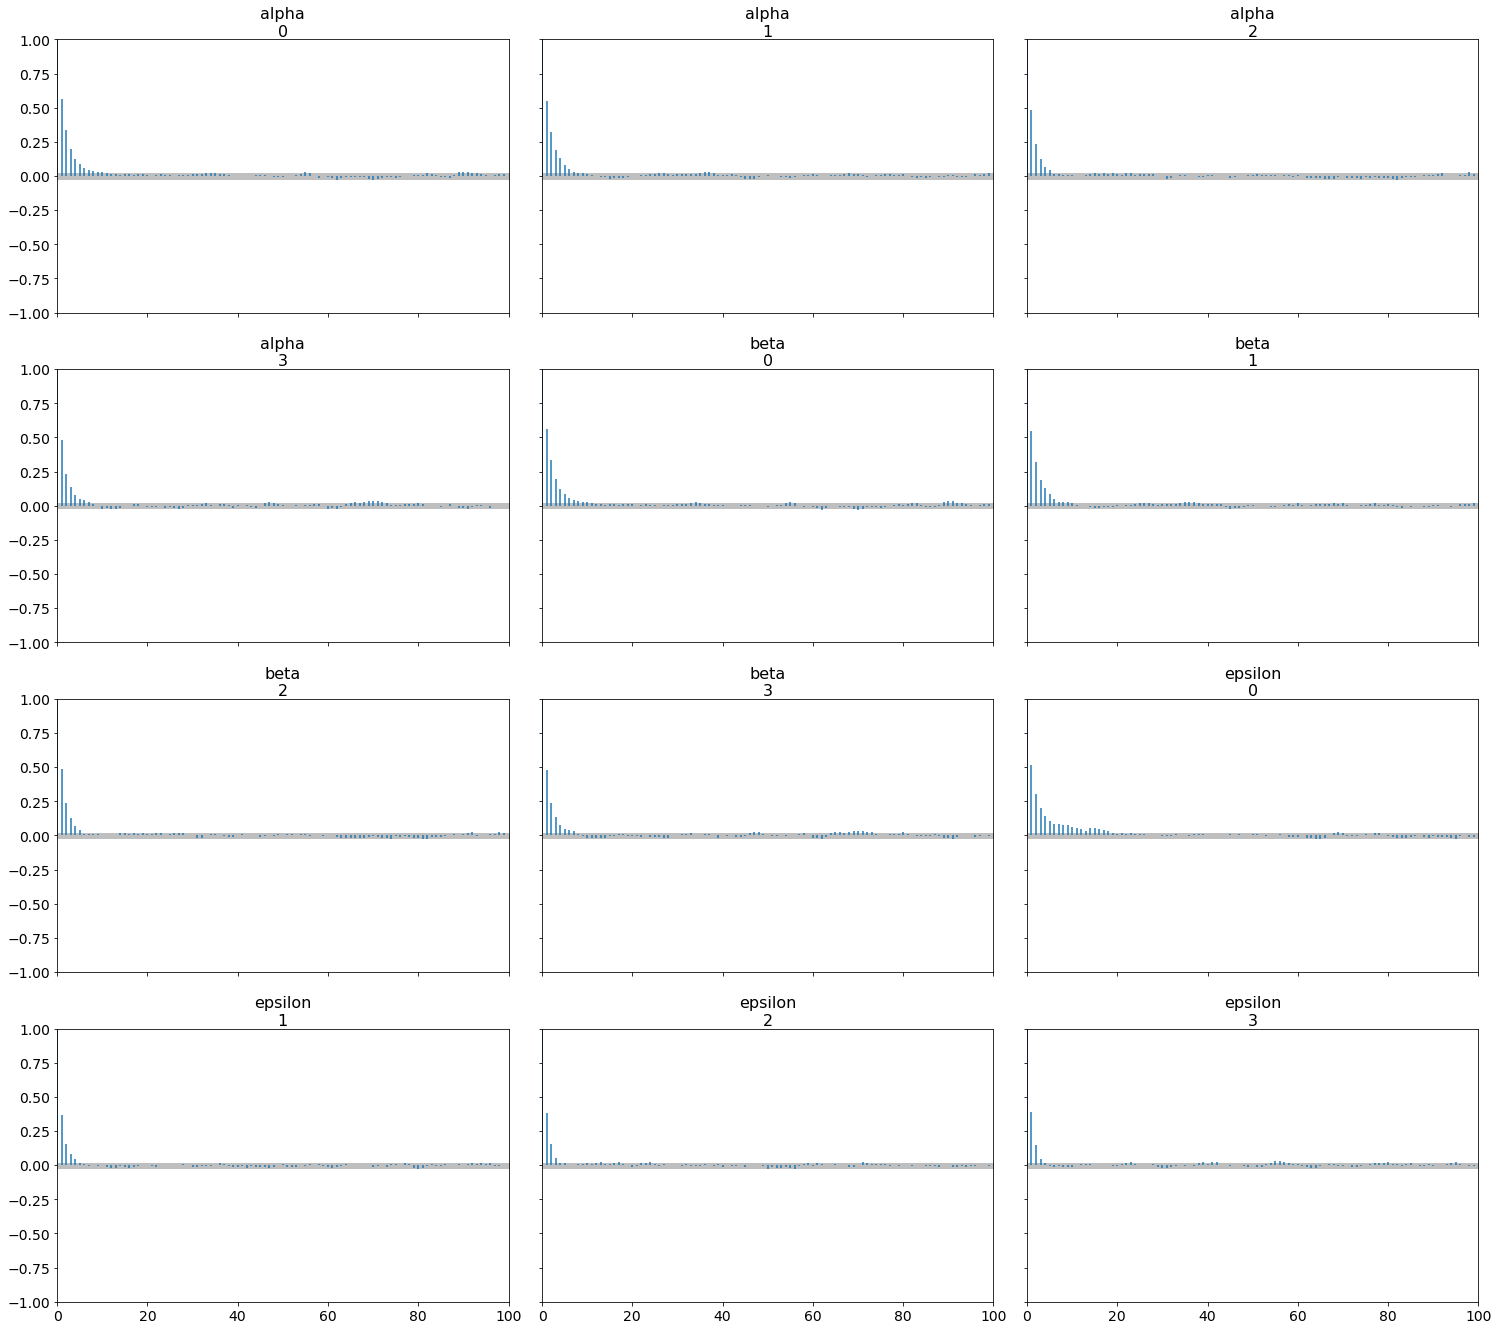

In [9]:
varnames = ['alpha', 'beta', 'epsilon']
pm.autocorrplot(trace_n, varnames)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$\\beta$')

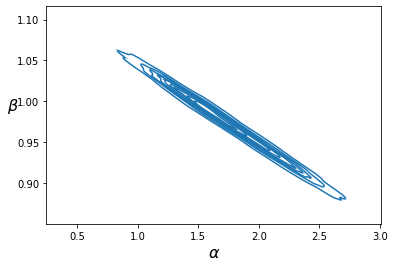

In [10]:
sns.kdeplot(trace['alpha'], trace['beta'])
plt.xlabel(r'$\alpha$', fontsize=16)
plt.ylabel(r'$\beta$', fontsize=16, rotation=0)

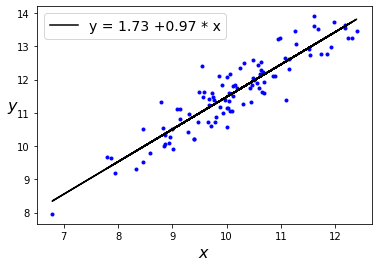

In [11]:

plt.plot(x, y, 'b.');
alpha_m = trace['alpha'].mean()
beta_m = trace['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} +{:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

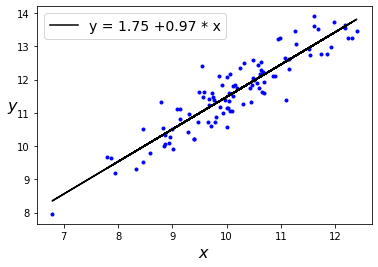

In [12]:
plt.plot(x, y, 'b.');
alpha_m = trace_n['alpha'].mean()
beta_m = trace_n['beta'].mean()
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} +{:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

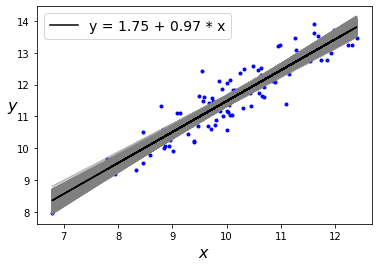

In [13]:
plt.plot(x, y, 'b.');
idx = range(0, len(trace['alpha']), 10)
plt.plot(x, trace['alpha'][idx] + trace['beta'][idx] * x[:,np.newaxis], c='gray', alpha=0.5);
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

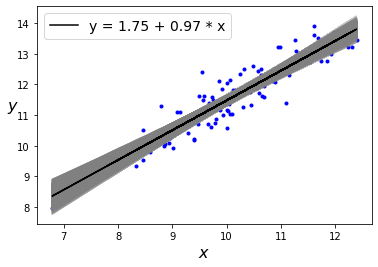

In [14]:
plt.plot(x, y, 'b.');
idx = range(0, len(trace_n['alpha']), 10)
plt.plot(x, trace_n['alpha'][idx] + trace_n['beta'][idx] * x[:,np.newaxis], c='gray', alpha=0.5);
plt.plot(x, alpha_m + beta_m * x, c='k', label='y = {:.2f} + {:.2f} * x'.format(alpha_m, beta_m))
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)
plt.legend(loc=2, fontsize=14)

In [22]:
pm.summary(trace_n)

/usr/local/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.751,0.450,0.896,2.586,0.004,0.003,11503.0,12658.0,1.0
beta,0.973,0.044,0.890,1.056,0.000,0.000,11499.0,12454.0,1.0
epsilon,0.474,0.034,0.410,0.537,0.000,0.000,12520.0,8057.0,1.0
rb,0.840,0.076,0.695,0.981,0.001,0.001,11499.0,12454.0,1.0
rss,0.842,0.076,0.699,0.984,0.001,0.001,11510.0,12335.0,1.0
